In [39]:
#SET 1 PART 1
import numpy as np

#DATASET
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [37]:
# optimizer
class SGD:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate

    def update(self, params, grads):
        new_params = [param - self.learning_rate * grad for param, grad in zip(params, grads)]
        return new_params


class SGDMomentum:
    def __init__(self, learning_rate=0.01, momentum=0.9):
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.velocity = None

    def update(self, params, grads):
        if self.velocity is None:
            self.velocity = [np.zeros_like(param) for param in params]
        self.velocity = [self.momentum * v + self.learning_rate * grad for v, grad in zip(self.velocity, grads)]
        new_params = [param - v for param, v in zip(params, self.velocity)]
        return new_params


class RMSProp:
    def __init__(self, learning_rate=0.001, rho=0.9, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.rho = rho
        self.epsilon = epsilon
        self.cache = None

    def update(self, params, grads):
        if self.cache is None:
            self.cache = [np.zeros_like(param) for param in params]
        self.cache = [self.rho * cache + (1 - self.rho) * (grad**2) for cache, grad in zip(self.cache, grads)]
        new_params = [param - self.learning_rate * grad / (np.sqrt(cache) + self.epsilon) for param, cache, grad in zip(params, self.cache, grads)]
        return new_params

In [38]:
#MODEL
class LinearRegression:
    def __init__(self, learning_rate=0.01, optimizer=SGD()):
        self.w = np.random.randn()
        self.b = np.random.randn()
        self.learning_rate = learning_rate
        self.optimizer = optimizer

    def predict(self, X):
        return X * self.w + self.b

    def train(self, X, y, epochs=100):
        for epoch in range(epochs):

            predictions = self.predict(X)
            loss = mse(y, predictions)


            dw = np.mean(X * (predictions - y))
            db = np.mean(predictions - y)


            self.w, self.b = self.optimizer.update([self.w, self.b], [dw, db])

In [36]:

model_sgd = LinearRegression(learning_rate=0.01, optimizer=SGD())
model_sgd_momentum = LinearRegression(learning_rate=0.01, optimizer=SGDMomentum())
model_rmsprop = LinearRegression(learning_rate=0.001, optimizer=RMSProp())


model_sgd.train(X, y)
model_sgd_momentum.train(X, y)
model_rmsprop.train(X, y)


sgd_loss = mse(y, model_sgd.predict(X))
sgd_momentum_loss = mse(y, model_sgd_momentum.predict(X))
rmsprop_loss = mse(y, model_rmsprop.predict(X))

print("Losses after training:")
print(f"SGD Loss: {sgd_loss}")
print(f"SGD with Momentum Loss: {sgd_momentum_loss}")
print(f"RMSProp Loss: {rmsprop_loss}")

Losses after training:
SGD Loss: 1.7539435455240633
SGD with Momentum Loss: 1.20307925975899
RMSProp Loss: 5.108960358415856


In [42]:
#PART 2

import numpy as np
import matplotlib.pyplot as plt

def generate_data(num_points=100):

    X = np.linspace(-1, 1, num_points)[:, np.newaxis]
    y = 2 * X**2 + 1 + np.random.randn(num_points, 1)
    return X, y

def compute_cost(X, w, b):

    y_pred = np.dot(X, w) + b
    return np.mean(0.5 * (y_pred - y)**2)

def gradient(X, y, w, b):

    y_pred = np.dot(X, w) + b
    dw = X * (y_pred - y)
    db = y_pred - y
    return dw, db

def update_weights(w, b, lr, dw, db):

    w -= lr * dw
    b -= lr * db
    return w, b




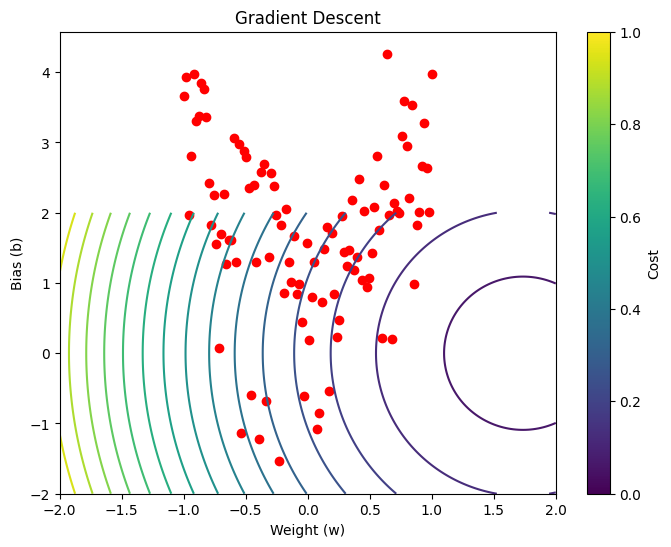

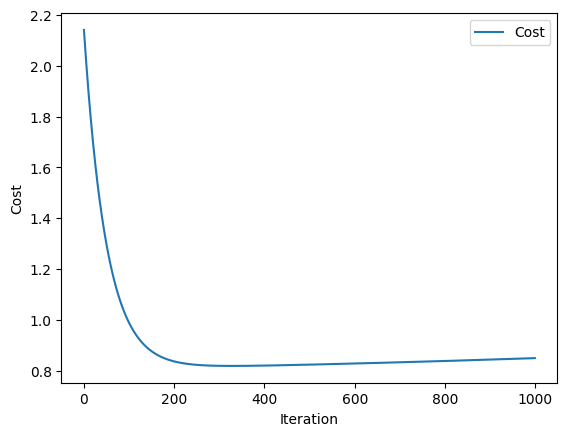

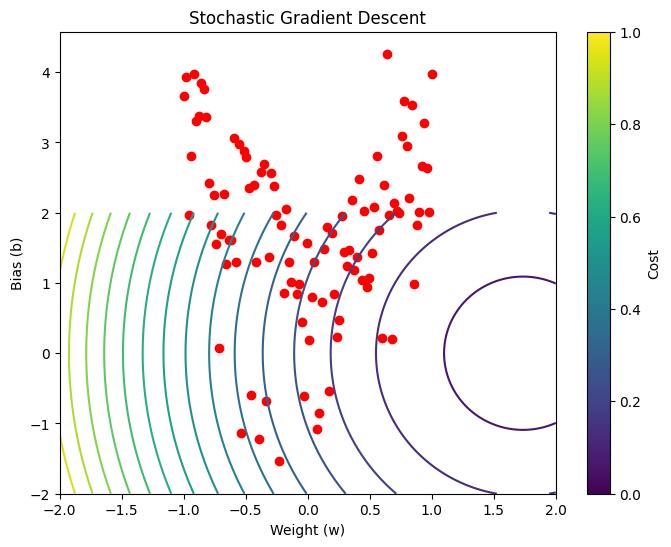

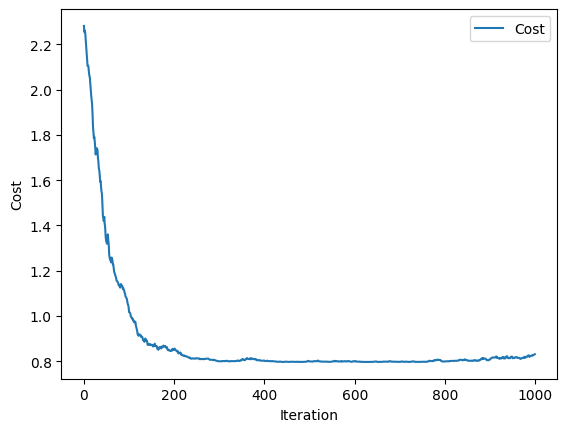

In [41]:
def visualize_contour(X, y, cost_func, title):

    w_range = np.linspace(-2, 2, 200)
    b_range = np.linspace(-2, 2, 200)
    cost_grid = np.zeros((len(w_range), len(b_range)))
    for i, w in enumerate(w_range):
        for j, b in enumerate(b_range):
            cost_grid[i, j] = cost_func(X, np.array([w]), np.array([b]))

    plt.figure(figsize=(8, 6))
    plt.contour(w_range, b_range, cost_grid, levels=15, cmap='viridis')
    plt.scatter(X, y, color='red', label='Data points')
    plt.xlabel('Weight (w)')
    plt.ylabel('Bias (b)')
    plt.title(title)
    plt.colorbar(label='Cost')
    plt.show()

def gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    """Performs gradient descent optimization."""
    w = np.random.randn(1)
    b = np.random.randn()
    cost_history = []
    for _ in range(num_iterations):
        cost_history.append(compute_cost(X, w, b))
        dw, db = gradient(X, y, w, b)
        w, b = update_weights(w, b, learning_rate, np.mean(dw), np.mean(db))

    visualize_contour(X, y, lambda x, w, b: compute_cost(x, w, b), title='Gradient Descent')
    plt.plot(np.arange(num_iterations), cost_history, label='Cost')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.legend()
    plt.show()

def stochastic_gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):

    w = np.random.randn(1)
    b = np.random.randn()
    cost_history = []
    for _ in range(num_iterations):
        index = np.random.randint(len(X))
        x_batch = X[index, np.newaxis]
        y_batch = y[index, np.newaxis]
        dw, db = gradient(x_batch, y_batch, w, b)
        w, b = update_weights(w, b, learning_rate, dw[0], db[0])
        cost_history.append(compute_cost(X, w, b))

    visualize_contour(X, y, lambda x, w, b: compute_cost(x, w, b), title='Stochastic Gradient Descent')
    plt.plot(np.arange(num_iterations), cost_history, label='Cost')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.legend()
    plt.show()

X, y = generate_data()

gradient_descent(X, y)

stochastic_gradient_descent(X, y)